<a href="https://colab.research.google.com/github/NucleiDatorum/Portfolio/blob/main/games_that_people_buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
Для возможности просмотра интерактивных графиков, созданных при помощи библиотеки Plotly, необходимо перейти по ссылке в Google Colab. <br>
В GitHub, к сожалению, диаграммы plotly не отображаются.
</div>

# ИГРЫ, КОТОРЫЕ ПОКУПАЮТ

**Описание проекта:**<br>
в распоряжение интернет-магазина "Стримчик" попали данные о видеоиграх за период с 1980 по 2016 год,<br>
в которых содержатся названия игр, жанр, год выпуска и платформа, <br>
количество проданных копий по регионам,<br>
оценки пользователей и критиков,<br>
и возрастной рейтинг.

**Цель проекта:**<br>
выявить закономерности, определяющие успешность игры,<br>
для определения потенциально популярного продукта<br>
и планирования будущих рекламных компаний.

**Краткое содержание:**<br>
1. Знакомство с данными.
2. Подготовка данных к анализу.
3. Исследование.
4. Портреты пользователей.
5. Проверка гипотез.
6. Общий вывод.

## Часть 1. Знакомство с данными

In [1]:
# импорт библиотек для работы с данными
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# библиотеки для визуализации
import plotly
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# для статистического анализа
import scipy.stats as st

In [2]:
# библиотека, позволяющая указывать несколько директорий хранения файла
import os

file_path_1 = '/Рабочий стол/ЯндексПрактикум/АналитикДанныхРасширенный/ПРОЕКТЫ/Стримчик/games.csv'
file_path_2 = '/content/games.csv'

if os.path.exists(file_path_1):
    df = pd.read_csv(file_path_1, delimiter=',')
elif os.path.exists(file_path_2):
    df = pd.read_csv(file_path_2, delimiter=',')
else:
    print('Something is wrong')

In [4]:
# первые строки датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# нормализация названий столбцов
df.columns = df.columns.str.lower()

In [6]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных:**
- `name` — название игры
- `platform` — платформа
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>

In [7]:
# общая статистика по категориальным признакам
df.describe(include='object')

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


<div style="border:solid orange 1px; padding: 20px">
11,5 тысяч игр в 12 жанрах, самый популярный из которых - экшен. <br>
31 платформа, самая топовая из них - PlayStation 2 серии.

In [8]:
# общая статистика по числовым признакам
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border:solid orange 1px; padding: 20px">
Данные собраны за период с 1980 по 20016 год.<br>
Больше всего копий продано в Северной Америке.<br>
Минимальная оценка критиков - 13, максимальная - 98 из 100.

In [9]:
# количество явных дубликатов
df.duplicated().sum()

0

In [10]:
# дубликаты по 3-м колонкам: название игры, платформа, год релиза
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [11]:
# удалим дубликаты
df = df.drop_duplicates(subset=['name', 'year_of_release', 'platform'])

In [12]:
# количество упоминаний по каждой игре
df.name.value_counts()

,count
name,
Need for Speed: Most Wanted,12
Ratatouille,9
LEGO Marvel Super Heroes,9
FIFA 14,9
Madden NFL 07,9
...,...
Jewels of the Tropical Lost Island,1
Sherlock Holmes and the Mystery of Osborne House,1
The King of Fighters '95 (CD),1


<div style="border:solid orange 1px; padding: 20px">
Игр, которые упоминаются более одного раза, не было в списке дубликатов по 3 колонкам. <br>
Значит, эти игры перевыпускались на разных платформах в разные годы.<br>
Проверим:

In [13]:
# все наблюдения для игры NFS: Most Wanted
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


<div style="border:solid orange 1px; padding: 20px">
Действительно, "NFS: Most Wanted" вышла в 2005 году сразу на нескольких платформах.<br>
Затем пережила перевыпуск в 2012 году также на нескольких платформах.<br>
И в 2013 вышла на WiiU.

In [14]:
# количество упоминаний каждого жанра
df.genre.value_counts()

,count
genre,
Action,3369
Sports,2347
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873


<div style="border:solid orange 1px; padding: 20px">
Больше всего выпускается игр в жанре экшен. На втором месте - спорт.

In [15]:
# количество упоминаний каждой платформы
df.platform.value_counts()

,count
platform,
PS2,2161
DS,2151
PS3,1330
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


<div style="border:solid orange 1px; padding: 20px">
Больше всего игр за весь наблюдаемый период было выпущено для приставки Sony PS2  и портативного игрового устройства Nintendo DS.

<div style="border:solid orange 1px; padding: 20px">
Чтобы лучше ориентироваться в игровых платформах, добавим производителя и тип консоли - стационарная или портативная. В таблице также есть игры для персональных компьютеров - PC.

In [16]:
# список всех платформ
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
# названия платформ и тип
platforms = pd.DataFrame(
    {'platform': ['Wii', 'NES', 'GB', 'DS', 'X360',
                  'PS3', 'PS2', 'SNES', 'GBA', 'PS4',
                  '3DS', 'N64', 'PS', 'XB', 'PC',
                  '2600', 'PSP', 'XOne','WiiU', 'GC',
                  'GEN', 'DC', 'PSV', 'SAT', 'SCD',
                  'WS', 'NG', 'TG16','3DO', 'GG', 'PCFX'],
     'manufacturer': ['Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Microsoft',
                      'Sony', 'Sony', 'Nintendo', 'Nintendo', 'Sony',
                      'Nintendo', 'Nintendo', 'Sony', 'Microsoft', 'PC_different',
                      'Atari', 'Sony', 'Microsoft', 'Nintendo', 'Nintendo',
                      'Sega', 'Sega', 'Sony', 'Sega', 'Sega','Bandai', 'SNK', 'NEC',
                      'Panasonic, Sanyo, Creative, Goldstar', 'Sega', 'NEC'],
     'kind': ['static', 'static',  'portable', 'portable', 'static',
              'static', 'static', 'static', 'portable', 'static',
              'portable', 'static', 'static', 'static', 'pc',
              'static', 'portable', 'static', 'static', 'static',
              'static', 'static', 'portable', 'static', 'static',
              'portable', 'static', 'static', 'static', 'portable', 'static']}
)

In [18]:
# все приставки, выпущенные компанией Nintendo
(platforms
 .query('manufacturer == "Nintendo"')
 .reset_index())

,index,platform,manufacturer,kind
0,0,Wii,Nintendo,static
1,1,NES,Nintendo,static
2,2,GB,Nintendo,portable
3,3,DS,Nintendo,portable
4,7,SNES,Nintendo,static
5,8,GBA,Nintendo,portable
6,10,3DS,Nintendo,portable
7,11,N64,Nintendo,static
8,18,WiiU,Nintendo,static
9,19,GC,Nintendo,static


In [19]:
# все приставки, выпущенные компанией Sony
(platforms
 .query('manufacturer == "Sony"')
 .reset_index())

,index,platform,manufacturer,kind
0,5,PS3,Sony,static
1,6,PS2,Sony,static
2,9,PS4,Sony,static
3,12,PS,Sony,static
4,16,PSP,Sony,portable
5,22,PSV,Sony,portable


In [20]:
# все приставки, выпущенные компанией Sega
(platforms
 .query('manufacturer == "Sega"')
 .reset_index())

,index,platform,manufacturer,kind
0,20,GEN,Sega,static
1,21,DC,Sega,static
2,23,SAT,Sega,static
3,24,SCD,Sega,static
4,29,GG,Sega,portable


In [21]:
# все приставки, выпущенные компанией Microsoft
(platforms
 .query('manufacturer == "Microsoft"')
 .reset_index())

,index,platform,manufacturer,kind
0,4,X360,Microsoft,static
1,13,XB,Microsoft,static
2,17,XOne,Microsoft,static


<div style="border:solid orange 1px; padding: 20px">
Самая плодовитая по количеству выпущенных платформ - это компания Nintendo, на счету которой 10 приставок, 4 из которых портативные.

In [22]:
# копия датасета до преобразования
df_copy = df.copy()
len(df_copy)

16713

In [23]:
# присоединим данные о производителях к основному датасету
df = df.merge(platforms[['platform', 'manufacturer', 'kind']],  how='left', on='platform')

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo,static
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo,static
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo,static
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo,static
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo,portable


In [25]:
# проверка на неизменность размера датасета
len(df) - len(df_copy)

0

In [26]:
# количество упоминаний каждого рейтинга, включая пропуски
df.rating.value_counts(dropna=False)

,count
rating,
NaN,6765
E,3989
T,2961
M,1563
E10+,1420
EC,8
K-A,3
RP,3
AO,1


<div style="border:solid orange 1px; padding: 20px">
Дополнительные данные о рейтингах организации ESRB из Википедии
(ссылка на источник: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):

In [27]:
wiki = pd.DataFrame(
    {'rating': ['EC', 'E',
                'K-A', 'E10+',
                'T', 'M',
                'AO', 'RP'],
     'meaning': ['Early childhood', 'Everyone',
                 'Everyone', 'Everyone 10 and older',
                 'Teen', 'Mature',
                 'Adults Only 18+', 'Rating Pending'],
     'age': ['3+', 'all',
             'all', '10+',
             '13+', '17+',
             '18+', 'unknown'],
     'description': ['Для детей младшего возраста', 'Для всех',
                     'Для всех', 'Для всех от 10 лет и старше',
                     'Игра подходит для лиц от 13 лет',
                     'Материалы игры не подходят для лиц младше 17 лет',
                     'Только для взрослых старше 18 лет', 'Рейтинг ожидается']}
)
wiki

,rating,meaning,age,description
0,EC,Early childhood,3+,Для детей младшего возраста
1,E,Everyone,all,Для всех
2,K-A,Everyone,all,Для всех
3,E10+,Everyone 10 and older,10+,Для всех от 10 лет и старше
4,T,Teen,13+,Игра подходит для лиц от 13 лет
5,M,Mature,17+,Материалы игры не подходят для лиц младше 17 лет
6,AO,Adults Only 18+,18+,Только для взрослых старше 18 лет
7,RP,Rating Pending,unknown,Рейтинг ожидается


In [28]:
# доля пропусков по каждому столбцу
df.isna().mean().sort_values(ascending=False)

,0
critic_score,0.513193
rating,0.404775
user_score,0.400886
year_of_release,0.016095
name,0.000060
genre,0.000060
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


### Вывод 1

Мы получили около 17 тысяч наблюдений по 11 признакам за 37 лет с 1980 по 2016 год. Известно, что данные за 2016 год могут быть неполными.<br>
Количество уникальных названий игр - 11559, из которых самое часто упоминаемое - Need for Speed: Most Wanted.<br>
Множественные упоминания одной и той же игры относятся к разным годам и разным платформам. Другими словами, есть игры, которые выходили на разных платформах и переживали перевыпуск в разные годы.<br>
В таблице представлена 31 платформа от 10 производителей, самая упоминаемая из них - PS2 от Sony, на втором месте - портативная DS от Nintendo.<br>
Всего представлено три типа игр - для стационарных консолей, портативных игровых устройств и игры для персональных компьютеров.<br>
Топовые жанры - Action и Sports, а всего жанров - 12.<br>
Больше всего продаж зафиксировано в Северной Америке.<br>
В данных есть пропуски. Больше всего в столбце с оценками критиков - 51%. По 40% пропусков в столбцах с оценками пользователей и рейтингом. Также есть пропуски в столбцах год выпуска, название игры и жанр.<br>
Типы данных некоторых столбцов не соответствуют их содержанию.<br>
Один дубликат удалён.

## Часть 2. Подготовка данных

### Пропуски

In [29]:
# количество пропусков в каждом столбце
df.isna().sum().sort_values()

,0
platform,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
manufacturer,0
kind,0
name,1
genre,1
year_of_release,269


#### Название игры

In [30]:
# строка с пропущенным названием игры
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN,Sega,static


<div style="border:solid orange 1px; padding: 20px">
В 1993 году для приставки Sega Genesis было выпущено достаточно много игр различных жанров. Восстановить пропуски без названия и жанра, только по году релиза - невозможно.<br>
Пропущены также рейтинг и оценки критиков и игроков.<br>
Удалим эту строку, поскольку она не представляет никакой ценности для анализа.

In [31]:
# копия датасета до преобразования
df_copy = df.copy()
len(df_copy)

16713

In [32]:
# удаление пропусков по столбцу с названием игры
df = df.dropna(subset=['name'])

In [33]:
# проверка, сколько строк удалили
len(df_copy) - len(df)

1

In [34]:
# количество пропусков в каждом столбце
df.isna().sum().sort_values()

,0
name,0
platform,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
manufacturer,0
kind,0
year_of_release,269


#### Год выпуска

In [35]:
# строки с пропущенным годом релиза
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,Sony,static
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,Sony,static
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,Nintendo,static
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,Sony,static
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,Atari,static
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,Sony,portable
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,Nintendo,static
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,PC_different,pc
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,Sony,static


<div style="border:solid orange 1px; padding: 20px">
Есть игры, в названиях которых содержится год. Например, "FIFA Soccer 2004" или "PDC World Championship Darts 2008".<br>
Посмотрим на них поближе:

In [36]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,Sony,static
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,Microsoft,static
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,Nintendo,static
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,Nintendo,portable


In [37]:
df.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,Sony,static
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E,Microsoft,static
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E,Nintendo,static
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E,Nintendo,portable


In [38]:
df.query('name == "PDC World Championship Darts 2008"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+,Nintendo,static
15952,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN,Nintendo,portable
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+,Sony,portable


<div style="border:solid orange 1px; padding: 20px">
"FIFA Soccer 2004" была выпущена в 2003 году, "PDC World Championship Darts 2008" - в 2008.<br>
Использовать год из названия игры для заполнения пропусков в столбце с годом релиза будет некорректно.<br>
В таблице есть игры, выпущенные в один год, но на разных платформах, а также перевыпущенные в других годах.

In [39]:
# первый и последний год релиза по каждой игре
year_min_max = (df
                .groupby('name')['year_of_release']
                .agg(['count', 'min', 'max'])
                .reset_index()
                .rename(columns={'count': 'count',
                                 'min': 'first_year',
                                 'max': 'last_year'})
                .sort_values('count', ascending=False))

year_min_max

,name,count,first_year,last_year
6715,Need for Speed: Most Wanted,12,2005.0,2013.0
7785,Ratatouille,9,2007.0,2007.0
2952,FIFA 14,9,2013.0,2013.0
5143,LEGO Marvel Super Heroes,9,2013.0,2013.0
5471,Madden NFL 08,8,2007.0,2007.0
...,...,...,...,...
11076,Wii de Asobu: Metroid Prime,0,NaN,NaN
9424,Super Puzzle Fighter II,0,NaN,NaN
586,Backbreaker,0,NaN,NaN
575,B.L.U.E.: Legend of Water,0,NaN,NaN


In [40]:
# перевыпущенные игры
year_min_max.query('first_year != last_year and count > 1')

,name,count,first_year,last_year
6715,Need for Speed: Most Wanted,12,2005.0,2013.0
9763,Terraria,8,2011.0,2016.0
6074,Monopoly,8,1994.0,2010.0
5125,LEGO Batman 2: DC Super Heroes,7,2012.0,2013.0
6403,NBA Jam,7,1992.0,2010.0
...,...,...,...,...
2071,Derby Stallion,2,1997.0,1999.0
11164,Wonder World Amusement Park,2,2008.0,2009.0
10373,Tom Clancy's Rainbow Six: Rogue Spear,2,2001.0,2002.0
167,Activision Anthology,2,2002.0,2003.0


<div style="border:solid orange 1px; padding: 20px">
Достаточно часты ситуации, когда одна и та же игра выпускалась в разные годы. Поэтому мы не можем заполнить пропуски известными значениями.<br>
Поскольку год релиза имеет значение для дальнейшего анализа, удалим пропуски и заменим тип данных на целочисленный.<br>

In [41]:
# копия датасета до преобразования
df_copy_2 = df.copy()
df_copy_2.shape

(16712, 13)

In [42]:
# удаление строк с пропусками в столбце год релиза
df = df.dropna(subset=['year_of_release'])

# исправление типа данных на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)

# проверка результата
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
 11  manufacturer     16443 non-null  object 
 12  kind             16443 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.8+ MB


In [43]:
df.shape

(16443, 13)

In [44]:
len(df_copy_2) - len(df)

269

#### Оценки пользователей

In [45]:
# список уникальных оценок пользователей
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div style="border:solid orange 1px; padding: 20px">
Кроме числовых значений встречаются нули, 'tbd' и пропуски.<br>
tbd означает оценку, которая ещё не подсчитана, то есть, недостаточно данных для оценки (to be determined).<br>
Можно заменить все пропуски на tbd и далее работать с оценками пользователей как с категориальным признаком.<br>
Или заменить tbd на пропуски и исправить тип данных на численный.<br>
Второй вариант мне кажется более предпочтительным, потому что оценки пользователей по смыслу - это числовые значения, которые можно сравнивать между собой, определять максимальное и минимальное, среднее и т.д.

In [46]:
# замена tbd на пропуски
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# замена типа данных object на float
df.user_score = df.user_score.astype('float')

In [47]:
# оценки пользователей по каждой игре
(df
 .groupby('name')['user_score']
 .agg(['count', 'min', 'max', 'median', 'mean'])
 .reset_index()
 .rename(columns={'count': 'game_count',
                  'min': 'min_score',
                  'max': 'max_score',
                  'median': 'median_score',
                  'mean': 'mean_score'})
 .sort_values('game_count', ascending=False)
 .head(10))

,name,game_count,min_score,max_score,median_score,mean_score
6640,Need for Speed: Most Wanted,9,6.1,9.1,8.50,8.377778
2916,FIFA 15,8,2.4,5.7,4.25,4.225000
9881,The LEGO Movie Videogame,8,5.4,7.7,6.85,6.687500
341,Angry Birds Star Wars,8,2.0,6.9,3.30,4.087500
5405,Madden NFL 07,8,4.2,9.3,8.10,7.512500
5147,Lego Batman 3: Beyond Gotham,8,6.4,7.7,6.90,6.950000
9660,Terraria,8,6.9,8.5,7.75,7.625000
5078,LEGO Jurassic World,8,6.7,8.1,7.15,7.275000
2915,FIFA 14,8,1.8,6.3,4.30,4.337500
2932,FIFA Soccer 13,8,1.6,6.6,5.10,4.762500


<div style="border:solid orange 1px; padding: 20px">
Оценки пользователей для одной и той же игры на разных платформах значительно разнятся. Заполнить пропуски средним или медианой будет некорректно. Оставим как есть.

#### Оценки критиков

In [48]:
# список уникальных оценок критиков
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [49]:
# оценки критиков по каждой игре
(df
 .groupby('name')['critic_score']
 .agg(['count', 'min', 'max', 'median', 'mean'])
 .reset_index()
 .rename(columns={'count': 'game_count',
                  'min': 'min_score',
                  'max': 'max_score',
                  'median': 'median_score',
                  'mean': 'mean_score'})
 .sort_values('game_count', ascending=False)
 .head(10))

,name,game_count,min_score,max_score,median_score,mean_score
5406,Madden NFL 08,8,71.0,85.0,76.0,77.125000
1290,Cars,8,50.0,71.0,67.5,64.500000
5405,Madden NFL 07,8,68.0,84.0,80.5,78.000000
6640,Need for Speed: Most Wanted,8,45.0,83.0,82.0,77.500000
5090,LEGO Star Wars II: The Original Trilogy,8,47.0,86.0,83.5,75.625000
10010,The Sims 2,7,58.0,90.0,73.0,72.285714
3932,Harry Potter and the Order of the Phoenix,7,51.0,69.0,63.0,61.571429
6631,Need for Speed Carbon,7,67.0,78.0,75.0,74.285714
8919,Spider-Man 3,7,50.0,79.0,60.0,59.857143
6644,Need for Speed: ProStreet,7,57.0,74.0,70.0,67.000000


<div style="border:solid orange 1px; padding: 20px">
Как и в случае с оценками пользователей оценки критиков для одной и той же игры могут значительно различаться на разных платформах. Заполнение пропусков средним или медианой исказит данные. Оставим без изменений.

#### Рейтинг

In [50]:
wiki

,rating,meaning,age,description
0,EC,Early childhood,3+,Для детей младшего возраста
1,E,Everyone,all,Для всех
2,K-A,Everyone,all,Для всех
3,E10+,Everyone 10 and older,10+,Для всех от 10 лет и старше
4,T,Teen,13+,Игра подходит для лиц от 13 лет
5,M,Mature,17+,Материалы игры не подходят для лиц младше 17 лет
6,AO,Adults Only 18+,18+,Только для взрослых старше 18 лет
7,RP,Rating Pending,unknown,Рейтинг ожидается


In [51]:
# уникальные значения рейтинга для игры Need for Speed: Most Wanted
nfs = df.query('name == "Need for Speed: Most Wanted"')
nfs.rating.unique()

array(['T', nan, 'E'], dtype=object)

<div style="border:solid orange 1px; padding: 20px">
На примере всё той же игры NFS видим, что рейтинг также может быть определён по разному. Возможно, это зависит от платформы.<br>
Не получится заполнить пропуски известными значениями.<br>
Заполним пропуски значением RP (рейтинг ожидается) и присоединим к таблице столбец с возрастом.

In [52]:
df.loc[df['rating'].isna() == True, 'rating'] = 'RP'
df = df.merge(wiki[['rating', 'age']],  how='left', on='rating')

In [53]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind,age
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Nintendo,static,all
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,Nintendo,static,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo,static,all
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Nintendo,static,all
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,Nintendo,portable,unknown


In [54]:
# количество пропусков в каждом столбце
df.isna().sum().sort_values()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
rating,0
manufacturer,0


### Суммарные продажи во всех регионах

In [55]:
# новый столбец с суммарными продажами по всем регионам
df['sales_total'] = df[['na_sales',
                        'eu_sales',
                        'jp_sales',
                        'other_sales']].sum(axis='columns')

In [56]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind,age,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Nintendo,static,all,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,Nintendo,static,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo,static,all,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Nintendo,static,all,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,Nintendo,portable,unknown,31.38


In [57]:
# типы данных
df.dtypes

,0
name,object
platform,object
year_of_release,int64
genre,object
na_sales,float64
eu_sales,float64
jp_sales,float64
other_sales,float64
critic_score,float64
user_score,float64


### Вывод 2

В данных много пропусков, заполнить их корректно невозможно. <br>
Строки с пропущенными годами выпуска и названием игры удалены.<br>
Тип данных с годом релиза исправлен на целочисленный.<br>
В столбце с рейтингом пропуски заменены на значение RP.<br>
В столбце с оценками пользователей значение "tbd" исправлено на пропуски и изменён тип данных на float.<br>
Добавлены новые столбцы: производитель консоли и её тип, возраст и суммарные продажи по всем регионам.

## Часть 3. Исследовательский анализ данных

In [58]:
def visual(data, x, y, color, title, xaxis_title, yaxis_title):
    """Функция для построения столбчатой диаграммы при помощи библиотеки plotly.

    На вход принимает название таблицы, признак для оси X, признак для оси Y,
    признак для цветовой градации, название диаграммы и названия осей X и Y.
    """
    pass
    fig = px.bar(data,
                 x=x, y=y,
                 color=color,
                 color_continuous_scale='rainbow')
    fig.update_layout(width = 800,
                      height = 400,
                      title={'text': title,
                             'y': 0.922, 'x': 0.5},
                      xaxis_title=xaxis_title,
                      yaxis_title=yaxis_title,
                      font=dict(color='RebeccaPurple'))
    fig.show()

### Количество игр по годам

In [59]:
# группировка по году и количеству уникальных игр
games_unique_count = (df
                      .groupby('year_of_release', as_index=False)['name']
                      .agg('nunique'))

In [60]:
# визуализация распределения
visual(games_unique_count,
       'year_of_release', 'name',
       'name',
       'Распределение количества выпущенных игр по годам',
       'Год выпуска',
       'Количество игр')

<div style="border:solid orange 1px; padding: 20px">
На графике видно несколько волн с пиками в 1998, 2002 и самый высокий пик в 2008 году. Данные за 2016 год не полные, поэтому нельзя ничего с уверенностью сказать о 2015 годе - пройденный это пик или только начало подъёма.<br>
В целом, с конца 20-го века по первое десятилетие 21-го количество игр увеличивалось, но после - пошло на спад.<br>
Известно, что в 2008 году стартовали магазины приложений для мобильных устройств App Store и Android Market (позднее - Google Play), которые положили начало бурному развитию мобильных игр.<br>
Известно также, что в 2016 году вышла мобильная игра "Pokémon Go", попавшая в Книгу рекордов Гиннесса, а мировые валовые доходы от мобильных игр впервые превысили доходы от игр для персональных компьютеров и консолей (источник: https://en.wikipedia.org/wiki/History_of_mobile_games).<br>
Несмотря на то, что в наших данных нет информации о мобильных играх, но мы можем предположить, что начавшийся с 2010 года спад видеоигр для приставок и ПК связан с переключением внимания разработчиков на мобильные платформы iOS и Android.

#### Количество игр по производителям приставок

In [61]:
df.manufacturer.value_counts()

,count
manufacturer,
Sony,6636
Nintendo,6169
Microsoft,2282
PC_different,957
Sega,259
Atari,116
SNK,12
Bandai,6
NEC,3


<div style="border:solid orange 1px; padding: 20px">
Больше всего игр было выпущено для консолей от Sony и Nintendo. <br>
На втором месте компания Microsoft, но следует помнить, что и на рынок она вышла значительно позже.

#### Время жизни каждой платформы

In [62]:
# первый и последний год для каждой платформы
platform_life_time = (df
                      .groupby('platform')['year_of_release']
                      .agg(['min', 'max'])
                      .reset_index())

# столбец с разницей междц первым и последним годом
platform_life_time['life_time'] = (platform_life_time['max']
                                   - platform_life_time['min'])

# переименование столбцов и сортировка по убыванию "времени жизни"
platform_life_time.columns = ['platform', 'first_year', 'last_year', 'life_time']
platform_life_time.sort_values(by='life_time', ascending=False)

,platform,first_year,last_year,life_time
13,PC,1985,2016,31
4,DS,1985,2013,28
5,GB,1988,2001,13
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
11,NES,1983,1994,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10


<div style="border:solid orange 1px; padding: 20px">
Дольше всех на игровом рынке существуют персональные компьютеры. Конечно же со временем они менялись, становились мощнее и функциональнее. Но в наших данных не отражены поколения процессоров и графических карт. PC 1985 года - это совсем не то же самое, что PC 2016.<br>
Тем не менее мы можем сделать вывод, что приставки приходят и уходят, а персональные компьютеры "вечны".<br>
На второй строчке мы видим портативное игровое устройство DS от Nintendo. Из открытых источников известно, что эта приставка была выпущена в 2004 году. 1985 год, указанный как минимальный, является ошибкой данных.<br>

In [63]:
# самые ранние игры для DS
(df
 .query('platform == "DS"')
 .sort_values(by='year_of_release')
 .head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,manufacturer,kind,age,sales_total
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.0,0.02,0.0,NaN,NaN,RP,Nintendo,portable,unknown,0.02
13253,Cocoto Kart Racer,DS,2004,Racing,0.04,0.0,0.00,0.0,NaN,NaN,E,Nintendo,portable,all,0.04
11339,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.0,0.08,0.0,NaN,NaN,RP,Nintendo,portable,unknown,0.08


<div style="border:solid orange 1px; padding: 20px">
Возможно, что ошибка в названии платформы. Либо неверно указан год.

#### Количество игр по производителям и году релиза

##### Sony

In [64]:
# группировка данных для Sony
plt_from_sony = (df
                 .query('manufacturer == "Sony"')
                 .groupby(['year_of_release', 'platform'], as_index=False)['name']
                 .agg('count'))

In [65]:
# визуализация распределения для приставок от Sony
visual(plt_from_sony,
       'year_of_release', 'name',
       'platform',
       'Распределение количества выпущенных игр по годам для приставок от Sony',
       'Год выпуска',
       'Количество игр')

<div style="border:solid orange 1px; padding: 20px">
Компания Sony за весь наблюдаемый период выпустила 6 платформ: 4 стационарных приставки и 2 портативных устройства.<br>
Время существования на рынке каждой платформы примерно 10-11 лет.<br>
Для половины из них игры больше не выпускаются. <br>
На 2016 год актуальны приставки PS3, PS4 и PSV, <br>
причём для PS3 количество игр идёт на спад.<br>
Год выхода PS4 - 2013, <br>
PSV - 2011.

##### Nintendo

In [66]:
# группировка данных для Nintendo
plt_from_nintendo = (df
                     .query('manufacturer == "Nintendo"')
                     .groupby(['year_of_release', 'platform'], as_index=False)['name']
                     .agg('count'))

In [67]:
# визуализация распределения для приставок от Nintendo
visual(plt_from_nintendo,
       'year_of_release', 'name',
       'platform',
       'Распределение количества выпущенных игр по годам для приставок от Nintendo',
       'Год выпуска', 'Количество игр')

<div style="border:solid orange 1px; padding: 20px">
Nintendo за всё время выпустила 10 приставок, из них на момент 2016 года актуальны только 2 - WiiU и портативная 3DS.<br>
Время жизни большинства ранних платформ - 6 лет, более поздних - 10 лет.<br>
Рекордсмен-долгожитель - портативный GameBoy (13 лет на рынке).<br>
Год выхода WiiU - 2012,<br>
3DS - 2011.

##### Microsoft

In [68]:
# группировка данных для Microsoft
plt_from_microsoft = (df
                      .query('manufacturer == "Microsoft"')
                      .groupby(['year_of_release', 'platform'], as_index=False)['name']
                      .agg('count'))

In [69]:
# визуализация распределения для приставок от Microsoft
visual(plt_from_microsoft,
       'year_of_release', 'name',
       'platform',
       'Распределение количества выпущенных игр по годам для приставок от Microsoft',
       'Год выпуска', 'Количество игр')

<div style="border:solid orange 1px; padding: 20px">
Microsoft пришла на рынок игровых приставок позже остальных и успела выпустить только 3 устройства. <br>
На момент 2016 года из них актуальны только две  - X360 и XOne. <br>
Время жизни XB - 8 лет, X360 и XOne - ещё не закончилось.<br>
Год выхода XOne - 2013.

### Актуальный период

<div style="border:solid orange 1px; padding: 20px">
В качестве актуального периода возьмём 2014 год. <br>
Рынок видеоигр очень динамичен, новые платформы сменяют старые, <br>
например, платформы Nintendo WII и DS не имеет новых релизов игр с 2013 года, PS2 - с 2011, PSP - с 2015.<br>
В такой ситуации нет смысла брать период больше 2-3 лет. Три года - оптимально для дальнейшего анализа.

In [70]:
# срез данных за период с 2014 по 2016 год
df_from_2014 = df.query('year_of_release > 2013')

In [71]:
df_from_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16442
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  manufacturer     1689 non-null   object 
 12  kind             1689 non-null   object 
 13  age              1689 non-null   object 
 14  sales_total      1689 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 211.1+ KB


### Продажи игр по платформам

In [72]:
# группировка платформ по общей сумме проданных копий
sales_by_platform = (df
                     .groupby('platform', as_index=False)['sales_total']
                     .agg('sum')
                     .sort_values(by='sales_total'))

In [73]:
# визуализация продаж по платформам
visual(sales_by_platform,
       'sales_total', 'platform',
       'sales_total',
       'Рейтинг платформ по сумме проданных копий',
       'Сумма проданных копий(млн.)',
       'Платформы')

<div style="border:solid orange 1px; padding: 20px">
По количеству проданных игр за весь период наблюдений уверенно лидирует с большим отрывом приставка Sony PlayStation 2 серии.<br>
За ней следует Microsoft Xbox 360, опередившая своих конкурентов PlayStation 3 и Nintendo Wii.<br>
На пятом месте - портативная приставка Nintendo DS.<br><br>
Судя по всему, лидером по продажам среди производителей приставок является компания Sony Computer Entertainment.

### Сравнение продаж с количеством выпущенных игр

In [74]:
# группировка платформ по количеству выпущенных игр и сумме проданных копий
sales_vs_count = (df
                  .groupby('platform', as_index=False)
                  .agg({'sales_total': 'sum', 'name': 'count'})
                  .rename(columns={'sales_total': 'sales_sum',
                                   'name': 'game_count'}))

In [75]:
# визуализация количества игр и суммы продаж по платформам
fig = px.scatter(
    sales_vs_count,
    x='platform', y='game_count',
    size='game_count',
    color='sales_sum',
    hover_name='platform',
    color_continuous_scale='rainbow'
)

fig.update_layout(
    width = 800,
    height = 400,
    title={'text': 'Количество выпущенных игр и сумма проданных копий по платформам',
           'y': 0.922, 'x': 0.5},
    xaxis_title='Платформы',
    yaxis_title='Количество выпущенных игр',
    font=dict(color='RebeccaPurple')
)

fig.update_xaxes(tickangle=45, showgrid=False)

fig.show()

<div style="border:solid orange 1px; padding: 20px">
Больше всего игр было выпущено для приставок DS и PS2. Но при этом игры для PS2 продавались заметно лучше.

In [76]:
# группировка по платформам, количеству игр, продажам и году релиза
sales_vs_count_year = (df
                       .groupby(['platform', 'year_of_release'], as_index=False)
                       .agg({'sales_total': 'sum',
                             'name': 'count'})
                       .rename(columns={'sales_total': 'sales_sum',
                                        'name': 'game_count'}))

In [77]:
# визуализация по платформам
fig = px.scatter(
    sales_vs_count_year,
    x='year_of_release', y='game_count',
    size='game_count',
    color='sales_sum',
    hover_name='platform',
    color_continuous_scale='rainbow'
)

fig.update_layout(
    width = 800,
    height = 400,
    title={'text': 'Количество выпущенных игр и сумма проданных копий по платформам и году релиза',
           'y': 0.922, 'x': 0.5},
    xaxis_title='Год выхода игры',
    yaxis_title='Количество выпущенных игр',
    font=dict(color='RebeccaPurple')
)

fig.show()

<div style="border:solid orange 1px; padding: 20px">
График является интерактивным, название платформы всплывает при наведении курсора на точку.<br>
Размер точки обозначает количество выпущенных игр (чем больше точка, тем больше игр). <br>
Цвет отвечает за сумму проданных копий в миллионах.<br><br>

Больше всего игр было выпущено с 2007 по 2009 год для портативной приставки DS.<br>
При этом продажи были средними.<br><br>

В 2009 году лучшие продажи показала приставка Wii.<br>
Лучшие годы в плане продаж для PS2 - это период с 2001 по 2005 год. <br>
Пик продаж для неё приходится на 2004 год, а пик по количеству выпущенных игр - на 2002.<br>
Из этого можно сделать вывод, что количество выпускаемых игр не гарантирует хорошие суммарные продажи.<br>
Скорее всего, большинство игр продаются небольшими тиражами и лишь отдельные игры становятся хитами.<br>
За период с 2012 по 2016 год мы видим некоторый упадок как по количеству, так и по продажам.<br>
Так же следует учесть, что на смену старым сериям приставок пришли новые <br>
и они, возможно, ещё не достигли своих пиков.

### Потенциально прибыльные платформы

In [78]:
# количество выпущенных игр по платформам с 2014 по 2016 г
game_cnt_new = (df_from_2014
                .groupby('platform', as_index=False)['name']
                .agg('count'))
game_cnt_new.columns = ['platform', 'count']

# миллионы проданных копий по платформам с 2011 по 2016 г
game_sls_new = (df_from_2014
                .groupby('platform', as_index=False)['sales_total']
                .agg('sum'))

# сумма проданных копий в сравнении с количеством выпущенных игр
game_cnt_sls_new = game_cnt_new.merge(game_sls_new[['platform', 'sales_total']], on='platform')
game_cnt_sls_new['roi'] = (game_cnt_sls_new['sales_total'] / game_cnt_sls_new['count'] * 100).round(1)
game_cnt_sls_new.sort_values(by='roi', ascending=False)

,platform,count,sales_total,roi
3,PS4,376,288.15,76.6
9,XOne,228,140.36,61.6
7,WiiU,73,42.98,58.9
6,Wii,11,5.07,46.1
8,X360,111,48.22,43.4
0,3DS,212,86.68,40.9
2,PS3,219,68.18,31.1
1,PC,151,27.05,17.9
5,PSV,295,22.40,7.6
4,PSP,13,0.36,2.8


<div style="border:solid orange 1px; padding: 20px">
Для периода с 2014 по 2016 год в тройке лидеров по отношению суммы проданных копий к количеству выпущенных игр на первом месте PS4, на втором - XOne, на третьем - WiiU.

### Глобальные продажи игр по платформам

In [79]:
# срез данных по актуальным платформам
a_platforms = ['PS3', 'PS4', 'X360', 'XOne', 'WiiU', '3DS', 'PSV', 'PC']
sales_box = df.query('platform in @a_platforms')

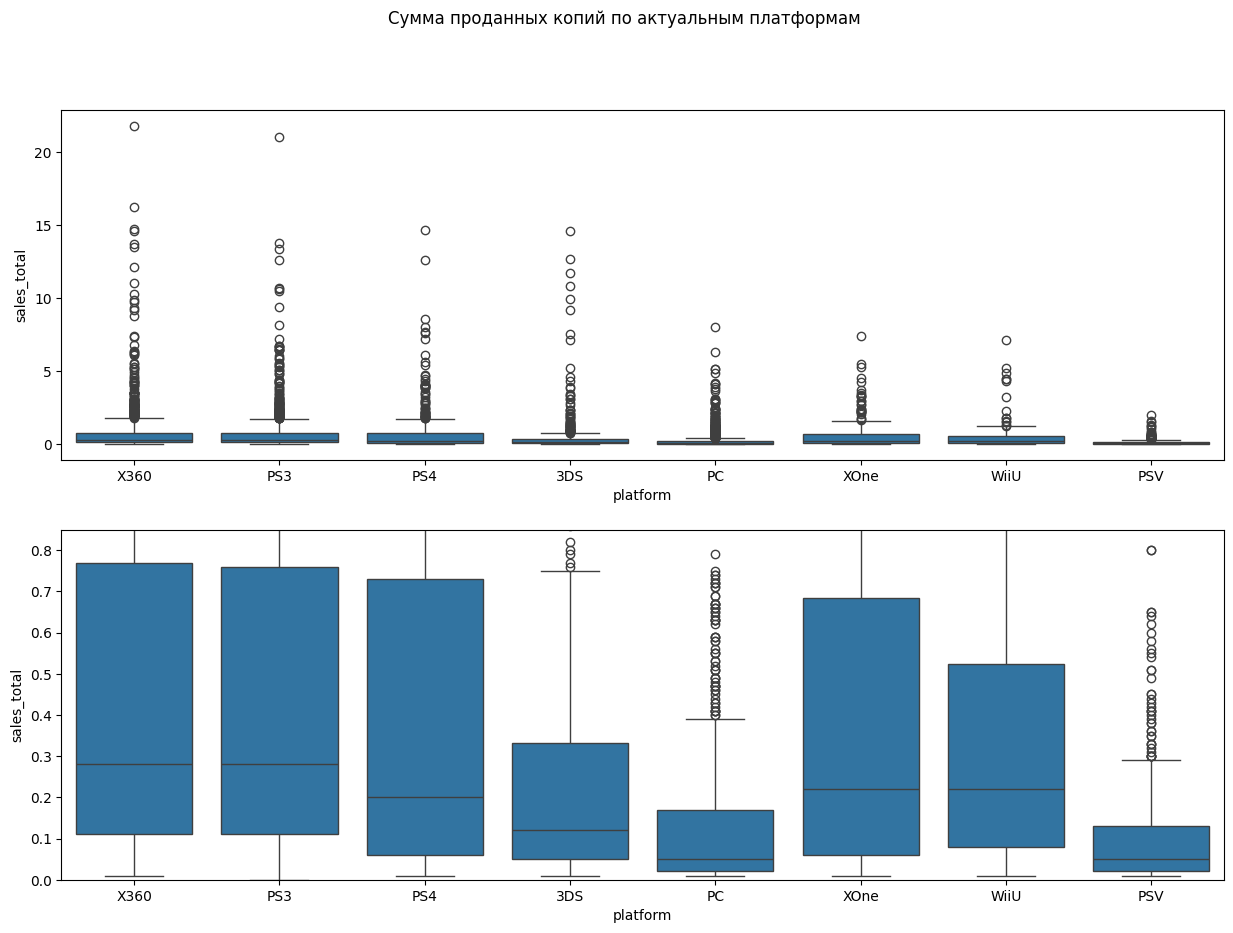

In [80]:
# визуализация продаж по актуальным платформам
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

fig.suptitle(
    'Сумма проданных копий по актуальным платформам'
    )

sns.boxplot(ax=axes[0],
            data=sales_box,
            x='platform',
            y='sales_total')

sns.boxplot(ax=axes[1],
            data=sales_box,
            x='platform',
            y='sales_total')

plt.ylim(0,0.85);

<div style="border:solid orange 1px; padding: 20px">
Половина выпущенных для этих платформ игр продаются тиражами чуть больше 0,2 миллиона копий. Что больше, чем у портативных приставок и ПК, но меньше, чем у PS3 и X360. <br>
В целом, ящики более поздних серий приставок сместились вниз в сторону уменьшения продаж по сравнению с ящиками их предшественниц.    

<div style="border:solid orange 1px; padding: 20px">
У каждой из рассматриваемых платформ медиана расположена ближе к нижнему краю. <br>
Это означает, что у большинства выпускаемых игр не самые высокие продажи.<br>
Наибольшие скопления точек находятся в диапазоне от 0 до 2 миллионов.<br>
И у каждой платформы есть некоторое количество выбросов.<br>
Это отдельные хиты, продаваемые большими тиражами.<br><br>

Несмотря на то, что X360 и PS3 близки к закату, так как им на смену уже пришли XOne и PS4,<br>
но они всё ещё способны выдавать суперхиты, продаваемые на сумму более 20 млн. копий.<br>
Это хоть и единичные игры, но продажи по ним очень высокие.<br>
По количеству хитов также выделяется платформа 3DS,<br>
следом за ней - Play Station 4.<br>

In [81]:
# Топ-5 самых продаваемых игр для X360
df_X360 = df.query('platform == "X360"')
df_X360[['name', 'sales_total']].sort_values(by='sales_total', ascending=False).head()

,name,sales_total
14,Kinect Adventures!,21.82
23,Grand Theft Auto V,16.27
29,Call of Duty: Modern Warfare 3,14.73
32,Call of Duty: Black Ops,14.62
35,Call of Duty: Black Ops II,13.68


In [82]:
# Топ-5 самых продаваемых игр для PS3
df_PS3 = df.query('platform == "PS3"')
df_PS3[['name', 'sales_total']].sort_values(by='sales_total', ascending=False).head()

,name,sales_total
16,Grand Theft Auto V,21.05
34,Call of Duty: Black Ops II,13.79
37,Call of Duty: Modern Warfare 3,13.33
41,Call of Duty: Black Ops,12.63
54,Gran Turismo 5,10.70


In [83]:
# Топ-5 самых продаваемых игр для 3DS
df_3DS = df.query('platform == "3DS"')
df_3DS[['name', 'sales_total']].sort_values(by='sales_total', ascending=False).head()

,name,sales_total
33,Pokemon X/Pokemon Y,14.60
40,Mario Kart 7,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
53,Super Mario 3D Land,10.81
62,New Super Mario Bros. 2,9.90


In [84]:
# Топ-5 самых продаваемых игр для PS4
df_PS4 = df.query('platform == "PS4"')
df_PS4[['name', 'sales_total']].sort_values(by='sales_total', ascending=False).head()

,name,sales_total
31,Call of Duty: Black Ops 3,14.63
42,Grand Theft Auto V,12.62
77,FIFA 16,8.58
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66


<div style="border:solid orange 1px; padding: 20px">
Интересно, что хиты у PS4 и 3DS совершенно разные. Казалось бы, что может быть общего у Call of Duty и Pokemon или у GTA и Mario?<br>
А общее у них - это практически одинаковая любовь игроков, если судить по количеству проданных копий.<br><br>

С другой стороны, мы также видим, что одна и та же игра выходила на разных конкурирующих платформах и имела разный успех.<br>
И это наводит на мысли о том, что возможно, каждая платформа обладает своими специфическими особенностями<br>
и поэтому популярна у какой-то одной специфической аудитории.<br>
Другими словами, <br>
геймер может иметь у себя в коллекции разные приставки<br>
со всеми их рулями, джойстиками и т.п., а играть только в игры на PC при помощи клавиатуры и мышки.<br>
И это, скорее всего, связано с личными особенностями различных людей, предпочитающих разные игры и разные устройства.

In [85]:
# Топ-10 хитов "всех времён и народов"
df[['name', 'platform',
    'year_of_release', 'genre',
    'critic_score', 'user_score',
    'age', 'sales_total']].sort_values(by='sales_total', ascending=False).head(10)

,name,platform,year_of_release,genre,critic_score,user_score,age,sales_total
0,Wii Sports,Wii,2006,Sports,76.0,8.0,all,82.54
1,Super Mario Bros.,NES,1985,Platform,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,82.0,8.3,all,35.52
3,Wii Sports Resort,Wii,2009,Sports,80.0,8.0,all,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,89.0,8.5,all,29.80
7,Wii Play,Wii,2006,Misc,58.0,6.6,all,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,87.0,8.4,all,28.32
9,Duck Hunt,NES,1984,Shooter,NaN,NaN,unknown,28.31


In [86]:
# Топ-10 хитов за период с 2014 по 2016 год
df_from_2014[['name', 'platform',
              'year_of_release', 'genre',
              'critic_score', 'user_score',
              'age', 'sales_total']].sort_values(by='sales_total', ascending=False).head(10)

,name,platform,year_of_release,genre,critic_score,user_score,age,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,97.0,8.3,17+,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,82.0,4.3,all,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,83.0,5.7,17+,7.66
94,FIFA 17,PS4,2016,Sports,85.0,5.0,all,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,87.0,6.5,17+,7.17


### Корреляция между отзывами и продажами

In [87]:
def scatter(data, x, color, title, xaxis):
    """Функция для построения диаграммы рассеяния при помощи библиотеки plotly.

    На вход принимает название таблицы, признак для оси X,
    признак для цветовой градации, название диаграммы и название оси X.
    """
    pass
    fig = px.scatter(
        data,
        x=x, y='sales_total',
        color=color
    )

    fig.update_layout(
        width = 800,
        height = 400,
        title={'text': title, 'y': 0.922, 'x': 0.5},
        xaxis_title=xaxis,
        yaxis_title='Сумма продаж в млн.копий',
        font=dict(color='RebeccaPurple')
    )

    fig.show()

In [88]:
# визуализация влияния оценок критиков на продажи для PS4
ps4 = df.query('platform == "PS4"')
scatter(ps4,
        'critic_score', 'sales_total',
        'Влияние оценок критиков на продажи для приставки PS4',
        'Оценки критиков')

In [89]:
# корреляция оценки критиков/продажи для PS4
ps4.critic_score.corr(ps4.sales_total)

0.40656790206178095

In [90]:
# визуализация влияния оценок пользователей на продажи для PS4
ps4 = df.query('platform == "PS4"')
scatter(ps4,
        'user_score', 'sales_total',
        'Влияние оценок пользователей на продажи для приставки PS4',
        'Оценки пользователей')

In [91]:
# корреляция оценки пользователей/продажи для PS4
ps4.user_score.corr(ps4.sales_total)

-0.031957110204556424

<div style="border:solid orange 1px; padding: 20px">
Для платформы PS4 наблюдается умеренная корреляция между оценками критиков и суммой проданных копий<br>
и отрицательная корреляция между оценками пользователей и продажами.

In [92]:
# срез данных по актуальным платформам
sales_box_corr = sales_box[['platform', 'user_score', 'critic_score', 'sales_total']]

In [93]:
# визуализация зависимости продаж от оценок критиков по актуальным платформам
scatter(sales_box_corr,
        'critic_score', 'platform',
        'Зависимость продаж от оценок критиков по актуальным платформам',
        'Оценки критиков')

<div style="border:solid orange 1px; padding: 20px">
Картина с оценками критиков для всех остальных актуальных платформ похожа на картину для PS4 - есть небольшая зависимость, <br> за исключением отдельных аномалий, когда недооценённые критиками игры показывали хорошие продажи.<br>
Также выглядит исключением мобильная платформа PSV, продажи которой, похоже, никак не зависят от оценок критиков.

In [94]:
# корреляция оценки критиков/продажи для PSV
psv = df.query('platform == "PSV"')
psv.critic_score.corr(psv.sales_total)

0.13176292727608935

In [95]:
# визуализация зависимости продаж от оценок пользователей по актуальным платформам
scatter(sales_box_corr,
        'user_score', 'platform',
        'Зависимость продаж от оценок пользователей по актуальным платформам',
        'Оценки пользователей')

<div style="border:solid orange 1px; padding: 20px">
Нет какой бы то ни было значимой зависимости между оценками пользователей и продажами по платформам.

### Распределение игр по жанрам

In [96]:
# группировка по годам и количеству игр в разных жанрах
genre_cnt = (df
             .groupby(['year_of_release', 'genre'], as_index=False)['name']
             .agg('count')
             .rename(columns={'name': 'count'})
             .sort_values(by='count'))

In [97]:
# визуализация частоты встречаемости жанров по годам
fig = px.scatter(
    genre_cnt,
    x='year_of_release', y='count',
    color='genre',
    size='count',
    color_discrete_sequence=px.colors.qualitative.Light24
)

fig.update_layout(
    width = 800,
    height = 450,
    title={'text': 'Распределение жанров по годам',
           'y': 0.922, 'x': 0.5},
    xaxis_title='Год',
    yaxis_title='Количество выпущенных игр',
    font=dict(color='RebeccaPurple')
)

fig.show()

<div style="border:solid orange 1px; padding: 20px">
Наблюдаем тройку лидеров: Action, Sports и Misc (мультижанровые игры).<br>
Посмотрим, какие жанры лучше продаются:

In [98]:
# группировка по годам и сумме проданных копий в разных жанрах
genre_sms = (df
             .groupby(['year_of_release', 'genre'], as_index=False)
             .agg({'name':'count', 'sales_total': 'sum'})
             .rename(columns={'name': 'count'})
             .sort_values(by='count'))

In [99]:
# визуализация продаж по году и жанру
fig = px.scatter(
    genre_sms,
    x='year_of_release', y='sales_total',
    size='count',
    color='genre',
    color_discrete_sequence=px.colors.qualitative.Dark24,
    hover_name='genre'
)

fig.update_layout(
    width = 800,
    height = 400,
    title={'text': 'Распределение жанров по годам и сумме проданных копий',
           'y': 0.922, 'x': 0.5},
    xaxis_title='Год',
    yaxis_title='Сумма проданных копий в миллионах',
    font=dict(color='RebeccaPurple')
)

fig.show()

<div style="border:solid orange 1px; padding: 20px">
По продажам лидируют те же жанры, что и по количеству выпущенных игр.<br>
Есть и отдельные выбросы, например, в 2006 году наибольшие продажи были у жанра Спорт, при том, <br>
что количество игр в этом жанре было меньше, чем у игр в жанре Экшен (размер точки на графике отвечает за количество выпущенных игр).<br>
В 2009 году также было выпущено игр в жанре Экшен больше, чем в жанре Спорт, но продажи в этих жанрах оказались на одном уровне.<br>
Скорее всего это связано с популярностью отдельных игр и их аномальными продажами.

In [100]:
# группировка по годам и сумме проданных копий в разных жанрах c 2014 по 2016 год
genre_2014 = (df_from_2014
              .groupby('genre', as_index=False)
              .agg({'name':'count', 'sales_total': 'sum'})
              .rename(columns={'name': 'count'}))

# соотношение суммы продаж к количеству игр по жанрам
genre_2014['roi'] = (genre_2014['sales_total']
                     / genre_2014['count']
                     * 100).round(1)
genre_2014.sort_values(by='roi', ascending=False)

,genre,count,sales_total,roi
8,Shooter,128,170.94,133.5
10,Sports,161,109.48,68.0
4,Platform,38,18.09,47.6
2,Fighting,60,28.22,47.0
7,Role-Playing,221,101.44,45.9
6,Racing,69,27.52,39.9
3,Misc,113,37.55,33.2
0,Action,619,199.36,32.2
9,Simulation,44,13.13,29.8
5,Puzzle,14,2.21,15.8


<div style="border:solid orange 1px; padding: 20px">
Наилучшее соотношение "качество-количество" у жанра Шутер - все игры в этом жанре хорошо продаются.<br>
На втором месте - Спорт.<br>
Экшен только на 8 месте. <br><br>
А высокий показатель продаж для жанра Экшен можно объяснить популярностью отдельных хитов,<br>
тогда как большая часть экшен-игр продаются не очень высокими тиражами.<br><br>

Другими словами, игр в жанре Экшен выпускается очень много, но "выстреливают" - отдельные еденицы. <br>
Зато так, что выводят весь жанр в топ по продажам.

### Вывод 3

- Количество выпускаемых игр до 2010 года росло, а после - стало снижаться.
- Лидеры по количеству игр в порядке убывания: Sony, Nintendo, Microsoft и PC.
- Самое пиковое значение приходится на 2008 год для приставки DS - выпущено почти 500 игр.
- Лидер по продажам: приставка Sony PlayStation 2 серии - более миллиарда проданных копий за весь период.
- Сумма продаж не зависит от количества выпущенных игр. Большинство игр продаются небольшими тиражами.
- Но у каждой платформы есть отдельные хиты, которые набрали выдающиеся суммы проданных копий.
- Отзывы критиков влияют на продажи очень слабо или вообще не влияют (как в случае с PSV).
- Отзывы пользователей на сумму продаж не оказывают вообще никакого влияния.
- Тройка лидеров по жанрам: Action, Sports и Misc (мультижанровые игры).

## Часть 4. Портреты пользователей

In [101]:
df_from_2014.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'manufacturer', 'kind', 'age', 'sales_total'],
      dtype='object')

<div style="border:solid orange 1px; padding: 20px">
Для дальнейшего анализа оставим в таблице только необходимые столбцы<br>
и сохраним данные по регионам за актуальный период в отдельные срезы.<br>
Затем добавим столбец с названием региона<br>
и объединим срезы в один датасет.

In [102]:
# новая таблица
df_new = df_from_2014[[
    'name', 'platform',
    'na_sales', 'eu_sales',
    'jp_sales', 'other_sales',
    'rating', 'age', 'genre'
]]
df_new.head()

,name,platform,na_sales,eu_sales,jp_sales,other_sales,rating,age,genre
31,Call of Duty: Black Ops 3,PS4,6.03,5.86,0.36,2.38,RP,unknown,Shooter
42,Grand Theft Auto V,PS4,3.96,6.31,0.38,1.97,M,17+,Action
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,4.35,3.49,3.10,0.74,RP,unknown,Role-Playing
77,FIFA 16,PS4,1.12,6.12,0.06,1.28,E,all,Sports
87,Star Wars Battlefront (2015),PS4,2.99,3.49,0.22,1.28,RP,unknown,Shooter


In [103]:
# срезы по регионам
na = df_new.query('na_sales > 0').reset_index()
del na['index']
na['region'] = 'North America'
na.drop(['eu_sales', 'jp_sales', 'other_sales'], axis= 1 , inplace= True)
na = na.rename(columns={'na_sales':'sales'})

eu = df_new.query('eu_sales > 0').reset_index()
del eu['index']
eu['region'] = 'Europe'
eu.drop(['na_sales', 'jp_sales', 'other_sales'], axis= 1 , inplace= True )
eu = eu.rename(columns={'eu_sales':'sales'})

jp = df_new.query('jp_sales > 0').reset_index()
del jp['index']
jp['region'] = 'Japan'
jp.drop(['eu_sales', 'na_sales', 'other_sales'], axis= 1 , inplace= True )
jp = jp.rename(columns={'jp_sales':'sales'})

other = df_new.query('other_sales > 0').reset_index()
del other['index']
other['region'] = 'other'
other.drop(['eu_sales', 'jp_sales', 'na_sales'], axis= 1 , inplace= True )
other = other.rename(columns={'other_sales':'sales'})

In [104]:
# объединение всех срезов в одну таблицу
regions = pd.concat([na, eu, jp, other], ignore_index=True)
regions

,name,platform,sales,rating,age,genre,region
0,Call of Duty: Black Ops 3,PS4,6.03,RP,unknown,Shooter,North America
1,Grand Theft Auto V,PS4,3.96,M,17+,Action,North America
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,4.35,RP,unknown,Role-Playing,North America
3,FIFA 16,PS4,1.12,E,all,Sports,North America
4,Star Wars Battlefront (2015),PS4,2.99,RP,unknown,Shooter,North America
...,...,...,...,...,...,...,...
3836,Looney Tunes: Galactic Sports,PSV,0.01,RP,unknown,Action,other
3837,Superdimension Neptune vs Sega Hard Girls,PSV,0.01,T,13+,Role-Playing,other
3838,Resident Evil 5 HD,PS4,0.01,RP,unknown,Action,other
3839,Aegis of Earth: Protonovus Assault,PSV,0.01,T,13+,Action,other


### Доля продаж по регионам

In [105]:
# визуализация доли продаж для каждого региона за актуальный период
fig = px.pie(
    regions,
    values='sales',
    names='region',
    title='Доля продаж для каждого региона с 2014 по 2016 год',
    color_discrete_sequence=px.colors.sequential.Turbo
)

fig.update_layout(
    width = 510,
    font=dict(color='RebeccaPurple')
)

fig.show()

<div style="border:solid orange 1px; padding: 20px">
Более 40% всех проданных копий за период с 2014 года приходится на Северную Америку.<br>
Чуть больше трети - на Европу.<br>
Оставшуюся часть делят Япония и все остальные страны.

### Популярные платформы по регионам

In [106]:
def sunburst(df, col, title):
    """Функция для построения круговой диаграммы при помощи библиотеки plotly.

    На вход принимает название таблицы, признак и название диаграммы.
    """
    pass
    fig = px.sunburst(
        df,
        path=['region', col],
        values='sales',
        color_discrete_sequence=['orange', 'blue',
                                 'green', 'red']
    )

    fig.update_layout(
        width = 555, title={'text': title,
                            'y': 0.955, 'x': 0.5},
        font=dict(color='RebeccaPurple')
    )

    fig.show()

In [107]:
# группировка по регионам и платформам
top_platforms = (regions
                 .groupby(['platform', 'region'], as_index=False)
                 .agg({'sales':'sum'})
                 .sort_values(by='sales', ascending=False))

In [108]:
# визуализация распределения популярных платформ по регионам за актуальный период
sunburst(top_platforms,
         'platform',
         'Популярные платформы по регионам с 2014 по 2016 год')

<div style="border:solid orange 1px; padding: 20px">
Для актуального периода 2014-2016 на первом и втором месте во всём мире, кроме Японии находятся PS4 и XOne.<br>
В Японии PS4 на втором месте, а на первом - портативная 3DS.<br>
Игры для ПК есть только в Топ-5 Европы. <br>
WiiU на пятом месте в Японии, а в других регионах эта платформа в Топ-5 не попала.    

### Популярные жанры по регионам

In [109]:
# группировка по регионам и жанрам
top_genres = (regions
              .groupby(['genre', 'region'], as_index=False)
              .agg({'sales':'sum'})
              .sort_values(by='sales', ascending=False))

In [110]:
# визуализация распределения популярных жанров по регионам за актуальный период
sunburst(top_genres,
         'genre',
         'Популярные жанры по регионам с 2014 по 2016 год')

<div style="border:solid orange 1px; padding: 20px">
Во всех регионах, кроме Японии, в первых строчках рейтинга находятся жанры Экшен, Шутер и Спорт.<br>
В Японии на первом месте - Ролевые игры, а Экшен - на втором.<br>
В остальных регионах Ролевые игры - на 4 месте.

### Влияние рейтинга ESRB

In [111]:
# группировка по регионам и возрастным ограничениям
top_age = (regions
           .groupby(['age', 'region'], as_index=False)
           .agg({'sales':'sum'})
           .sort_values(by='sales', ascending=False))

In [112]:
# визуализация влияния рейтинга ESRB по регионам за актуальный период
sunburst(top_age,
         'age',
         'Возрастные ограничения по регионам с 2014 по 2016 год')

<div style="border:solid orange 1px; padding: 20px">
Также как и с жанрами с возрастными ограничениями похожая картина:<br>
во всех регионах, кроме Японии, первые три места идентичны - "17+", "неизвестно" и "для всех возрастов".<br>
Япония совпадает с остальным миром только по третьему месту - "для всех возрастов".

<div style="border:solid orange 1px; padding: 20px">
В Японии есть своя система рейтингов - CERO, критикуемая за излишнюю строгость и необъективность. Кровь и сцены насилия запрещены (вплоть до вырезания таких сцен), девочки в купальниках и откровенных позах - можно. Возможно, игры без рейтинга проще купить, за них не требуют предъявить документы.   

### Вывод 4

Больше всего активных геймеров, приходится на Северную Америку и Европу - 39 и 37% от общей суммы проданных копий. Наиболее популярная платформа во всех регионах, кроме Японии - PS4. В Японии эта приставка на втором месте. А на первом - 3DS. Единственный регион, в Топ-5 которого есть ПК - это Европа (4 место).<br><br>

Жанры, которые предпочитают в Европе и в Америке, совпадают - это Экшен, Шутер, Спорт и Ролевые игры. Отличается только пятая позиция в рейтинге - для Европы это Гонки, для Америки - Мультижанровые игры.<br><br>

Япония заметно отличается по своим предпочтениям от остального мира. Ролевые игры для неё находятся на первом месте в Топ-5 популярных жанров. На втором месте - Экшен. Доля остальных жанров очень мала по сравнению с двумя предыдущими. Также интересной особенностью японцев является любовь к портативным игровым устройствам: 1 место занимает 3DS, 3 место - PSV. Microsoft в Топ-5 Японии не попал.<br><br>

В целом, в Европе и Америке конкурируют между собой Sony и Microsoft. Nintendo фигурирует в этих регионах на предпоследней и последней строчках рейтинга с портативным устройством 3DS. Стационарная приставка Nintendo WiiU вошла только в Топ-5 Японии - последнее место.<br><br>

Что касается возрастных ограничений, то в Америке и Европе на первом месте игры с ограничением "17+". В Японии - без ограничений.

## Часть 5. Проверка гипотез

### Рейтинги платформ Xbox One и PC

Попытаемся определить, являются ли пользовательские оценки игр для платформы Xbox One в среднем выше, чем для персональных компьютеров? <br>
Для этого создадим две выборки: xone_user и pc_user. <br>
Сравним их между собой, используя метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей. <br><br>
Сформулируем гипотезы. <br>
**Нулевая гипотеза**: средние значения оценок пользователей для платформы XOne и PC равны.<br>
**Альтернативная гипотеза**: среднее значение оценок пользователей для XOne выше, чем среднее значение оценок пользователей для PC.

In [113]:
# оценки пользователей для платформы XOne
xone_users = (df_from_2014
              .query('platform == "XOne" and user_score.isnull() == False')
              .user_score)
# оценки пользователей для PC
pc_users = (df_from_2014
            .query('platform == "PC" and user_score.isnull() == False')
            .user_score)

# размер выборок
print('Размер выборки Xbox One:', len(xone_users))
print('Размер выборки PC:', len(pc_users))

Размер выборки Xbox One: 165
Размер выборки PC: 122


In [114]:
# зададим уровень значимости
alpha = 0.05

# проведём ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
# используем аргумент equal_var, так как выборки не равны по размеру
results = st.ttest_ind(xone_users, pc_users, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверим p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.05800699043334416
Нет оснований отвергнуть нулевую гипотезу


<div style="border:solid orange 1px; padding: 20px">
Есть основания полагать, что пользователи на обеих платформах оценивают игры примерно одинаково.

### Рейтинги жанров Action и Sports

Попробуем определить, есть ли разница между средними пользовательскими оценками для жанров Action и Sports.<br>
Для этого сравним две выборки за актуальный период: оценки пользователей для игр в жанре экшен (action_users) и для игр в жанре спорт (sports_users) по методу Стьюдента.

**Нулевая гипотеза:**<br>
Средние пользовательские оценки для  жанров Action и Sports равны.<br>
**Альтернативная гипотеза:**<br>
Средняя оценка пользоателей для жанра Action выше, чем для жанра Sports.

In [115]:
# оценки пользователей для жанра экшен
action_users = (df_from_2014
                .query('genre == "Action" and user_score.isnull() == False')
                .user_score)
# оценки пользователей для PC
sports_users = (df_from_2014
                .query('genre == "Sports" and user_score.isnull() == False')
                .user_score)

# размер выборок
print('Размер выборки Action:', len(action_users))
print('Размер выборки Sports:', len(sports_users))

Размер выборки Action: 297
Размер выборки Sports: 127


In [116]:
# зададим уровень значимости
alpha = 0.05

# проведём ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
# используем аргумент equal_var, так как выборки не равны по размеру
results = st.ttest_ind(action_users, sports_users, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверим p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.912775191322278e-15
Отвергаем нулевую гипотезу


<div style="border:solid orange 1px; padding: 20px">
Судя по результату теста, пользователи оценивают игры в жанре экшен в среднем выше, чем в жанре спорт.

### Вывод 5

Для проверки гипотез мы использовали метод проверки равенства среднего двух генеральных совокупностей.<br>
В первом случае мы не смогли отвергнуть нулевую гипотезу и оставили версию, что пользователи оценивают игры для XOne и PC примерно одинаково.<br>
Во втором случае нулевую гипотезу можно отвергнуть и согласиться с тем, что жанр Экшен оценивается игроками выше, чем жанр Спорт.

## Общий вывод

### Проделанная работа

Полученные данные потребовали предварительной подготовки:
- нормализации названий столбцов,
- удаления найденного дубликата,
- удаления пропусков в столбце с годом релиза,
- замены "tbd" в столбце с оценками пользователей на пропуски,
- исправления типа данных.
- Пропуски в столбце с возрастным рейтингом заменили на RP (рейтинг ожидается).
- Пропуски в столбцах с оценками критиков и пользователей оставили без изменений, так как корректно заполнить их невозможно и лучше не удалять в виду их большого количества (можно потерять много ценной информации).
- Добавили столбец с сумарными продажами. <br>
После этого провели исследовательский анализ, рассмотрели особенности регионов и проверили две гипотезы.

### Выводы

В ходе исследования выявлено следующее:
1. В первое десятилетие 21 века рынок видеоигр преживал бурное развитие. Но уже с 2011 года количество выпускаемых игр пошло на спад. Возможно, это связано с развитием мобильных устройств и переключением внимания разработчиков игр и игроков на эти платформы.
2. Большинство игр, независимо от жанра и платформы, продаются небольшими тиражами. И только отдельные игры становятся хитами и выходят в топы продаж.
3. Непревзойденным лидером по числу проданных копий является приставка Sony PlayStation 2. Но игры для неё больше не выпускаются, так как на смену ей пришли PlayStation 3 и PlayStation 4, у которых тоже хорошие показатели продаж и места в Топ-5 во всех регионах.
4. Японский рынок несколько отличается от американского и европейского. Здесь также любят PS3 и PS4, но на первом месте - портативная приставка Nintendo 3DS. Также и по жанрам - японцы предпочитают Ролевые игры, а Экшен у них на втором месте. Спортивные игры вообще не попали в японский Топ-5 жанров. Тогда как в Европе и Америке на первом месте Экшен, а Ролевые игры на четвёртом. На втором и третьем - Шутер и Спортивные игры.
5. Оценки критиков и тем более игроков ничего не говорят об успешности игры. На них лучше не ориентироваться.

### Рекомендации

При планировании рекламной компании в большей степени следует учитывать региональные особенности и в меньшей степени оценки критиков. <br>
Хорошие шансы стать хитом у игр в жанре Экшен. Но также не следует забывать, что среди хитов были и Спортивные игры, и Ролевые, и Платформеры.<br>
Потенциально прибыльные платформы на момент 2016 года: для всех регионов PS4. Для Америки и Европы - XOne. Для Японии - 3DS.<br>
Возрастной рейтинг - "17+", без рейтинга или "для всех".